# Import Library

In [187]:
#Library inti
import pandas as pd
import numpy as np

#Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

#library untuk pre processing data
from scipy import stats

#Library untuk eksperimen pemodelan
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

#Library untuk evaluasi hasil pemodelan
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Library untuk mengakses drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pre Processing Data Train

In [188]:
#Pemanggilan data train
df_salju_train = pd.read_csv('drive/My Drive/malin/salju_train.csv')
#Drop kolom yang tidak digunakan
df_salju_train.drop(columns = ['id','Tanggal','KodeLokasi','ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm'],inplace = True)
#Menampilkan data setelah drop beberapa kolom
df_salju_train.head()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,10.4,15.5,4.8,NaN,NaN,24.0,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,9.0,17.0,8.0,2.6,7.4,NaN,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,18.2,32.0,0.0,NaN,NaN,44.0,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,7.3,24.5,0.0,8.4,10.4,54.0,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5.9,20.3,0.0,3.6,12.6,37.0,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [189]:
#Drop data yang duplikat
df_salju_train = df_salju_train.drop_duplicates()
#Drop data yang memiliki nilai null
df_salju_train = df_salju_train.dropna()
#Menampilkan data setelah drop beberapa data
df_salju_train.head()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
3,7.3,24.5,0.0,8.4,10.4,54.0,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5.9,20.3,0.0,3.6,12.6,37.0,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak
5,14.4,21.8,0.0,3.2,4.4,39.0,19.0,20.0,63.0,52.0,1016.1,1012.5,7.0,7.0,16.7,21.1,Tidak,Tidak
6,7.7,18.7,0.2,5.6,9.7,46.0,19.0,28.0,69.0,31.0,1011.3,1008.8,1.0,1.0,11.3,18.3,Tidak,Tidak
8,18.4,35.3,0.0,10.0,12.5,33.0,11.0,13.0,44.0,18.0,1017.9,1013.4,0.0,0.0,23.7,34.9,Tidak,Tidak


In [190]:
#Mengubah value dari kolom "BersaljuHariIni" menjadi biner
df_salju_train["BersaljuHariIni"].replace(["Tidak", "Ya"], [0,1], inplace = True)
#Mengubah value dari kolom "BersaljuBesok" menjadi biner
df_salju_train["BersaljuBesok"].replace(["Tidak", "Ya"], [0,1], inplace = True)
#Menampilkan data setelah perubahan
df_salju_train.head()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
3,7.3,24.5,0.0,8.4,10.4,54.0,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,0
4,5.9,20.3,0.0,3.6,12.6,37.0,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,0
5,14.4,21.8,0.0,3.2,4.4,39.0,19.0,20.0,63.0,52.0,1016.1,1012.5,7.0,7.0,16.7,21.1,0,0
6,7.7,18.7,0.2,5.6,9.7,46.0,19.0,28.0,69.0,31.0,1011.3,1008.8,1.0,1.0,11.3,18.3,0,0
8,18.4,35.3,0.0,10.0,12.5,33.0,11.0,13.0,44.0,18.0,1017.9,1013.4,0.0,0.0,23.7,34.9,0,0


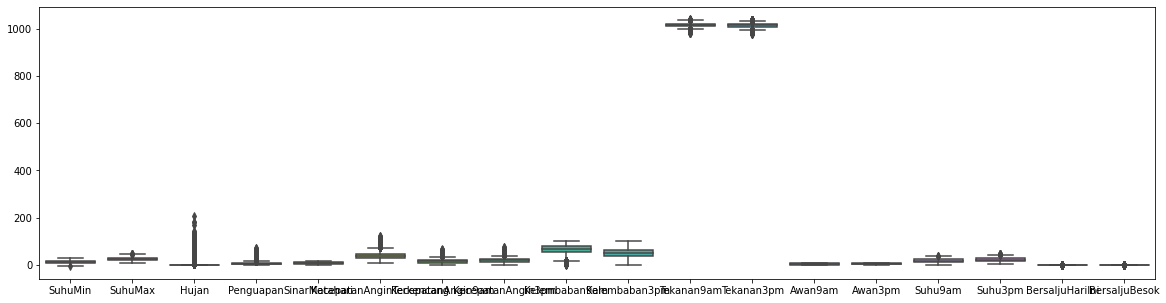

In [191]:
#Visualisasi data
plt.figure(figsize=(20,5))
sns.boxplot(data= df_salju_train)

In [192]:
#Menampilkan jumlah data beserta dengan outliers
print("jumlah data dengan outliers:", df_salju_train.shape)
#Drop outliers
df_salju_train = df_salju_train[(np.abs(stats.zscore(df_salju_train)) < 3).all(axis=1)]
#Menampilkan jumlah data setelah drop outliers
print("jumlah data tanpa outliers:", df_salju_train.shape)

jumlah data dengan outliers: (43677, 18)
jumlah data tanpa outliers: (41348, 18)


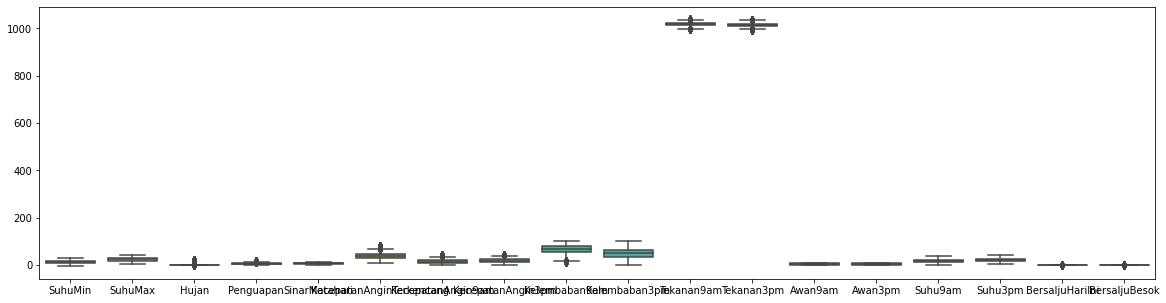

In [193]:
#Visualisasi data
plt.figure(figsize=(20,5))
sns.boxplot(data= df_salju_train)

In [194]:
#Mengubah nilai data pada tiap kolom menjadi range 0-1
df_salju_train_MinMax = (df_salju_train - df_salju_train.min()) / (df_salju_train.max() - df_salju_train.min())
#Menyimpan kolom-kolom yang bukan target kedalam variabel x_train
x_train = df_salju_train_MinMax.iloc[:, :-1].values
#Menyimpan kolom yang merupakan target ("BersaljuBesok") kedalam variabel y_train
y_train = df_salju_train_MinMax.iloc[:, -1].values
#Menampilkan data
x_train

array([[0.36901408, 0.47519582, 0.        , ..., 0.41666667, 0.48837209,
        0.        ],
       [0.32957746, 0.36553525, 0.        , ..., 0.34114583, 0.35658915,
        0.        ],
       [0.56901408, 0.40469974, 0.        , ..., 0.453125  , 0.43410853,
        0.        ],
       ...,
       [0.56619718, 0.51958225, 0.        , ..., 0.56770833, 0.54780362,
        0.        ],
       [0.72957746, 0.45430809, 0.        , ..., 0.59114583, 0.45994832,
        0.        ],
       [0.46760563, 0.61357702, 0.        , ..., 0.58333333, 0.64341085,
        0.        ]])

# Pre Processing Data Test

In [195]:
#Pemanggilan data test
df_salju_test = pd.read_csv('drive/My Drive/malin/salju_test.csv')
#Drop kolom yang tidak digunakan
df_salju_test.drop(columns = ['Tanggal','KodeLokasi','ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm'],inplace = True)
#Menampilkan data setelah drop beberapa kolom
df_salju_test.head()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,11.0,27.5,0.0,NaN,6.4,46.0,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,10.0,19.9,0.2,NaN,NaN,56.0,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,9.2,27.2,0.0,5.2,10.4,33.0,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,17.7,27.0,0.0,4.6,6.7,35.0,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,2.3,7.9,88.0,NaN,NaN,46.0,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


In [196]:
#Drop data yang duplikat
df_salju_test = df_salju_test.drop_duplicates()
#Drop data yang memiliki nilai null
df_salju_test = df_salju_test.dropna()
#Menampilkan data setelah drop beberapa data
df_salju_test.head()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
2,9.2,27.2,0.0,5.2,10.4,33.0,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,17.7,27.0,0.0,4.6,6.7,35.0,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
7,14.4,22.4,0.0,4.4,3.9,28.0,9.0,11.0,57.0,51.0,1022.6,1020.7,7.0,7.0,18.3,20.9,No,No
8,20.3,33.7,0.0,11.8,11.1,52.0,20.0,24.0,54.0,33.0,1007.7,1005.6,5.0,5.0,24.6,32.2,No,No
10,8.1,18.2,0.0,1.6,5.1,31.0,11.0,15.0,94.0,48.0,1027.1,1024.5,7.0,7.0,10.3,17.7,No,No


In [197]:
#Mengubah value dari kolom "BersaljuHariIni" menjadi biner
df_salju_test["BersaljuHariIni"].replace(["No", "Yes"], [0,1], inplace = True)
#Mengubah value dari kolom "BersaljuBesok" menjadi biner
df_salju_test["BersaljuBesok"].replace(["No", "Yes"], [0,1], inplace = True)
#Menampilkan data setelah perubahan
df_salju_test.head()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
2,9.2,27.2,0.0,5.2,10.4,33.0,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,0,0
3,17.7,27.0,0.0,4.6,6.7,35.0,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,0,0
7,14.4,22.4,0.0,4.4,3.9,28.0,9.0,11.0,57.0,51.0,1022.6,1020.7,7.0,7.0,18.3,20.9,0,0
8,20.3,33.7,0.0,11.8,11.1,52.0,20.0,24.0,54.0,33.0,1007.7,1005.6,5.0,5.0,24.6,32.2,0,0
10,8.1,18.2,0.0,1.6,5.1,31.0,11.0,15.0,94.0,48.0,1027.1,1024.5,7.0,7.0,10.3,17.7,0,0


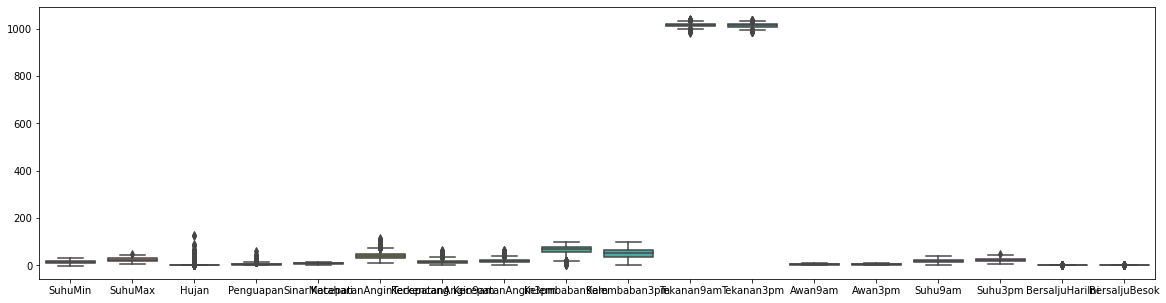

In [198]:
#Visualisasi data
plt.figure(figsize=(20,5))
sns.boxplot(data= df_salju_test)

In [199]:
#Menampilkan jumlah data beserta dengan outliers
print("jumlah data dengan outliers:", df_salju_test.shape)
#Drop outliers
df_salju_train = df_salju_train[(np.abs(stats.zscore(df_salju_train)) < 3).all(axis=1)]
#Menampilkan jumlah data setelah drop outliers
print("jumlah data tanpa outliers:", df_salju_test.shape)

jumlah data dengan outliers: (7225, 18)
jumlah data tanpa outliers: (7225, 18)


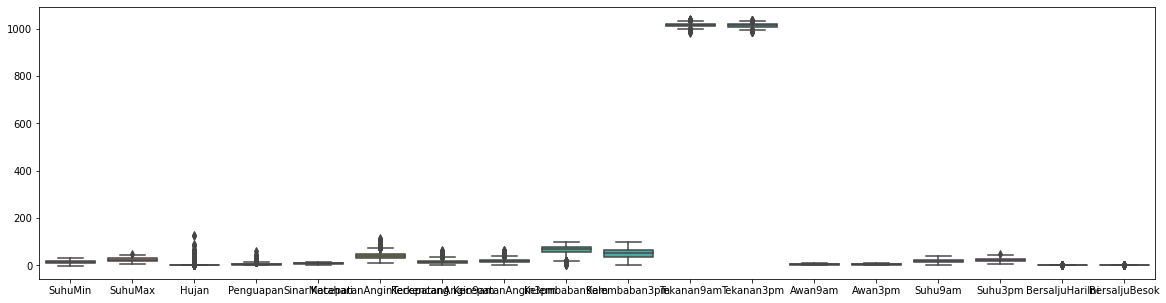

In [200]:
#Visualisasi data
plt.figure(figsize=(20,5))
sns.boxplot(data= df_salju_test)

In [201]:
#Mengubah nilai data pada tiap kolom menjadi range 0-1
df_salju_test_MinMax = (df_salju_test - df_salju_test.min()) / (df_salju_test.max() - df_salju_test.min())
#Menyimpan kolom-kolom yang bukan target kedalam variabel x_test
x_test = df_salju_test_MinMax.iloc[:, :-1].values
#Menyimpan kolom yang merupakan target ("BersaljuBesok") kedalam variabel y_test
y_test = df_salju_test_MinMax.iloc[:, -1].values
#Menampilkan data
x_test

array([[0.40524781, 0.48267327, 0.        , ..., 0.35849057, 0.52058111,
        0.        ],
       [0.65306122, 0.47772277, 0.        , ..., 0.58490566, 0.52300242,
        0.        ],
       [0.55685131, 0.36386139, 0.        , ..., 0.47708895, 0.38983051,
        0.        ],
       ...,
       [0.36443149, 0.4480198 , 0.        , ..., 0.43665768, 0.46489104,
        0.        ],
       [0.49854227, 0.46782178, 0.        , ..., 0.44474394, 0.50605327,
        0.        ],
       [0.50145773, 0.47029703, 0.        , ..., 0.60107817, 0.49878935,
        0.        ]])

# Pemodelan

In [202]:
#Membuat sebuah objek menggunakan metode decision tree classifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#Melakukan data train dengan dataset yang ada dengan menggunakan metode fit
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [203]:
#Melakukan klasifikasi pada data test
y_pred = model.predict(x_test)
#Menggabungkan data test dengan hasil prediksi untuk melakukan perbandingan
df_hasil = pd.concat([pd.DataFrame(y_test, columns=['test']) ,pd.DataFrame(y_pred, columns=['predict'])], axis=1)
#Menampilkan data yang sudah digabung
df_hasil.head()

,test,predict
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


# Evaluasi

Accuracy: 78.31 %
Precision: 52.60 %
Recall: 42.73 %
F1 score: 47.15 %


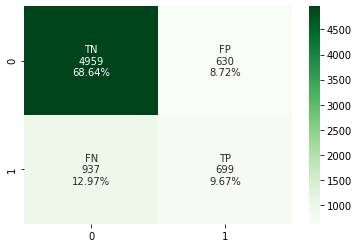

In [204]:
#Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Menghitung accuracy dengan rumus accuracy = (TP + TN ) / (TP + FP + FN + TN)
accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy: %0.2f' % accuracy , '%')
#Menghitung precision dengan rumus precision = (TP) / (TP + FP)
precision = precision_score(y_test, y_pred) * 100
print('Precision: %0.2f' % precision , '%')
#Menghitung recall dengan rumus recall = (TP) / (TP + FN)
recall = recall_score(y_test, y_pred ) *100
print('Recall: %0.2f' % recall , '%')
#Menghitung f1 score dengan rumus f1 score = 2 * (Recall * Precission) / (Recall + Precission)
f1 = f1_score(y_test, y_pred , '%') *100
print('F1 score: %0.2f' % f1 , '%')

#Visualisasi confusion matrix
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

# Eksperimen ke-1 (Naive Bayes)

In [205]:
#Menyimpan kolom-kolom yang bukan target kedalam variabel x_train
eks1_x_train = df_salju_train_MinMax.iloc[:, :-1].values
#Menyimpan kolom yang merupakan target ("BersaljuBesok") kedalam variabel y_train
eks1_y_train = df_salju_train_MinMax.iloc[:, -1].values
#Menyimpan kolom-kolom yang bukan target kedalam variabel x_test
eks1_x_test = df_salju_test_MinMax.iloc[:, :-1].values
#Menyimpan kolom yang merupakan target ("BersaljuBesok") kedalam variabel y_test
eks1_y_test = df_salju_test_MinMax.iloc[:, -1].values

In [206]:
#Membuat sebuah objek menggunakan metode Naive Bayes
eks1_model = GaussianNB()
#Melakukan data train dengan dataset yang ada dengan menggunakan metode fit
eks1_model.fit(eks1_x_train, eks1_y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [207]:
#Melakukan klasifikasi pada data test
eks1_y_pred = eks1_model.predict(eks1_x_test)
#Menggabungkan data test dengan hasil prediksi untuk melakukan perbandingan
eks1_df_hasil = pd.concat([pd.DataFrame(eks1_y_test, columns=['test']) ,pd.DataFrame(eks1_y_pred, columns=['predict'])], axis=1)
#Menampilkan data yang sudah digabung
eks1_df_hasil.head()

,test,predict
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


Accuracy: 80.83 %
Precision: 56.59 %
Recall: 65.89 %
F1 score: 60.89 %


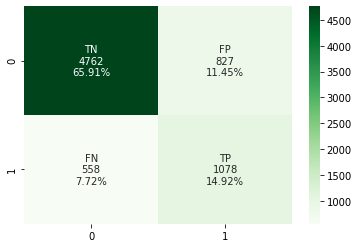

In [208]:
#Membuat confusion matrix
eks1_cm = confusion_matrix(eks1_y_test, eks1_y_pred)

#Menghitung accuracy dengan rumus accuracy = (TP + TN ) / (TP + FP + FN + TN)
accuracy = accuracy_score(eks1_y_test, eks1_y_pred) * 100
print('Accuracy: %0.2f' % accuracy , '%')
#Menghitung precision dengan rumus precision = (TP) / (TP + FP)
precision = precision_score(eks1_y_test, eks1_y_pred) * 100
print('Precision: %0.2f' % precision , '%')
#Menghitung recall dengan rumus recall = (TP) / (TP + FN)
recall = recall_score(eks1_y_test, eks1_y_pred ) *100
print('Recall: %0.2f' % recall , '%')
#Menghitung f1 score dengan rumus f1 score = 2 * (Recall * Precission) / (Recall + Precission)
f1 = f1_score(eks1_y_test, eks1_y_pred , '%') *100
print('F1 score: %0.2f' % f1 , '%')

#Visualisasi confusion matrix
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in eks1_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in eks1_cm.flatten()/np.sum(eks1_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(eks1_cm, annot=labels, fmt='', cmap='Greens')

# Eksperimen ke-2 (Logistic Regression)

In [209]:
#Menyimpan kolom-kolom yang bukan target kedalam variabel x_train
eks2_x_train = df_salju_train_MinMax.iloc[:, :-1].values
#Menyimpan kolom yang merupakan target ("BersaljuBesok") kedalam variabel y_train
eks2_y_train = df_salju_train_MinMax.iloc[:, -1].values
#Menyimpan kolom-kolom yang bukan target kedalam variabel x_test
eks2_x_test = df_salju_test_MinMax.iloc[:, :-1].values
#Menyimpan kolom yang merupakan target ("BersaljuBesok") kedalam variabel y_test
eks2_y_test = df_salju_test_MinMax.iloc[:, -1].values

In [210]:
#Membuat sebuah objek menggunakan metode Logistic Regression
eks2_model = LogisticRegression(random_state = 0)
#Melakukan data train dengan dataset yang ada dengan menggunakan metode fit
eks2_model.fit(eks2_x_train, eks2_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [211]:
#Melakukan klasifikasi pada data test
eks2_y_pred = eks2_model.predict(eks2_x_test)
#Menggabungkan data test dengan hasil prediksi untuk melakukan perbandingan
eks2_df_hasil = pd.concat([pd.DataFrame(eks2_y_test, columns=['test']) ,pd.DataFrame(eks2_y_pred, columns=['predict'])], axis=1)
#Menampilkan data yang sudah digabung
eks2_df_hasil.head()

,test,predict
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


Accuracy: 84.60 %
Precision: 80.58 %
Recall: 42.11 %
F1 score: 55.32 %


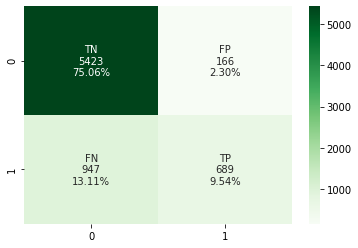

In [212]:
#Membuat confusion matrix
eks2_cm = confusion_matrix(eks2_y_test, eks2_y_pred)

#Menghitung accuracy dengan rumus accuracy = (TP + TN ) / (TP + FP + FN + TN)
accuracy = accuracy_score(eks2_y_test, eks2_y_pred) * 100
print('Accuracy: %0.2f' % accuracy , '%')
#Menghitung precision dengan rumus precision = (TP) / (TP + FP)
precision = precision_score(eks2_y_test, eks2_y_pred) * 100
print('Precision: %0.2f' % precision , '%')
#Menghitung recall dengan rumus recall = (TP) / (TP + FN)
recall = recall_score(eks2_y_test, eks2_y_pred ) *100
print('Recall: %0.2f' % recall , '%')
#Menghitung f1 score dengan rumus f1 score = 2 * (Recall * Precission) / (Recall + Precission)
f1 = f1_score(eks2_y_test, eks2_y_pred , '%') *100
print('F1 score: %0.2f' % f1 , '%')

#Visualisasi confusion matrix
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in eks2_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in eks2_cm.flatten()/np.sum(eks2_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(eks2_cm, annot=labels, fmt='', cmap='Greens')